# HM1: Logistic Regression.

### Name: [Sri Naga Hansi Mamidi]


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also, you should plot their objective values versus epochs and compare their training and testing accuracy. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [1]:
# Load Packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [2]:
data=pd.read_csv("data.csv")
data
data.drop('Unnamed: 32', axis=1, inplace=True)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.2 Examine and clean data

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.

df=pd.DataFrame(data)
df=df.drop(['id'],axis=1)
df=df.replace('B',1)
df


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df=df.replace('M',-1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.3. Partition to training and testing sets

In [7]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machine learning.

x_train, x_test, y_train, y_test = train_test_split(df.drop('diagnosis',axis=1), 
                                                    df['diagnosis'], test_size=0.2, 
                                                    random_state=42)
# n1=x_train.shape[0]
# n2=x_test.shape[0]
# y_train=np.array(y_train).reshape(n1,1)
# y_test=np.array(y_test).reshape(n2,1)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape
x_train, x_test, y_train, y_test

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 68         9.029         17.33           58.79      250.5          0.10660   
 181       21.090         26.57          142.70     1311.0          0.11410   
 63         9.173         13.86           59.20      260.9          0.07721   
 248       10.650         25.22           68.01      347.0          0.09657   
 60        10.170         14.88           64.55      311.9          0.11340   
 ..           ...           ...             ...        ...              ...   
 71         8.888         14.64           58.79      244.0          0.09783   
 106       11.640         18.33           75.17      412.5          0.11420   
 270       14.290         16.82           90.30      632.6          0.06429   
 435       13.980         19.62           91.12      599.5          0.10600   
 102       12.180         20.52           77.22      458.7          0.08013   
 
      compactness_mean  concavity_mean  concave po

## 1.4. Feature scaling

Use the standardization to transform both training and test features

In [8]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).values.reshape(1, d)
sig = numpy.std(x_train, axis=0).values.reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))


test mean = 
radius_mean                0.013646
texture_mean               0.122535
perimeter_mean             0.017830
area_mean                  0.007201
smoothness_mean            0.221149
compactness_mean           0.068722
concavity_mean            -0.006214
concave points_mean        0.083925
symmetry_mean              0.011485
fractal_dimension_mean     0.028301
radius_se                  0.055695
texture_se                 0.130663
perimeter_se               0.018831
area_se                    0.028115
smoothness_se              0.084815
compactness_se            -0.042242
concavity_se              -0.144548
concave points_se         -0.077631
symmetry_se               -0.019083
fractal_dimension_se      -0.045792
radius_worst               0.035400
texture_worst              0.116600
perimeter_worst            0.023669
area_worst                 0.031653
smoothness_worst           0.181063
compactness_worst          0.049100
concavity_worst           -0.057414
concave points_

In [9]:
x_train=np.concatenate((x_train,np.ones((x_train.shape[0],1))),axis=1)
x_train.shape
x_test=np.concatenate((x_test,np.ones((x_test.shape[0],1))),axis=1)
x_test.shape

(114, 31)

# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistic regression and when $\lambda > 0$, it essentially becomes a regularized logistic regression.

In [10]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    yxTw=np.dot(np.multiply(y,x),w)
    mean=np.mean(np.log(1+np.exp(-yxTw)))
    log_reg=(lam/2)*np.square(np.sum(w))
    loss=mean+log_reg
    return loss
# pass



In [11]:
d=x_train.shape[1]
w=np.zeros((d,1))
y_train=np.array(y_train).reshape(x_train.shape[0],1)
lam=0
loss=objective(w,x_train,y_train,lam)
print("Objective function value/loss: "+str(loss))

Objective function value/loss: 0.6931471805599453


# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [12]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    yx=np.multiply(y,x)
    yxTw=np.dot(yx,w)
    mean=-np.mean(np.divide(yx,1+np.exp(yxTw)),axis=0).reshape(x.shape[1],1)
#     print(mean.shape)
    g=mean+lam*w
    return g


In [13]:
# Gradient descent for solving logistic regression
# You will need to do iterative processes (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    objvals=np.zeros(max_epoch)
    for i in range(max_epoch):
        objective_value=objective(w,x,y,lam)
        objvals[i]=objective_value
        grad=gradient(w,x,y,lam)
        w-=learning_rate*grad
        
    return w,objvals


Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [14]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam=0
learning_rate=0.1
w=np.zeros((d,1))
w_gd, objvals_gd=gradient_descent(x_train,y_train,lam,learning_rate,w)
w_gd, objvals_gd

(array([[-0.37669549],
        [-0.3563752 ],
        [-0.37310921],
        [-0.37318216],
        [-0.15031546],
        [-0.12869813],
        [-0.29018185],
        [-0.39822207],
        [-0.09644155],
        [ 0.14998635],
        [-0.32911769],
        [-0.00879974],
        [-0.27638172],
        [-0.29673247],
        [-0.000952  ],
        [ 0.11577579],
        [ 0.09112133],
        [-0.04458518],
        [ 0.07284136],
        [ 0.19383092],
        [-0.44542195],
        [-0.43548073],
        [-0.42545609],
        [-0.42059207],
        [-0.30095308],
        [-0.20714363],
        [-0.28923018],
        [-0.39881884],
        [-0.30809827],
        [-0.09045903],
        [ 0.35416251]]),
 array([0.69314718, 0.52753622, 0.44115723, 0.38771795, 0.35076929,
        0.32334696, 0.30197895, 0.28472811, 0.27042246, 0.25830813,
        0.24787625, 0.23876973, 0.23072971, 0.22356345, 0.217124  ,
        0.21129712, 0.20599239, 0.20113715, 0.19667222, 0.19254883,
        0.188

In [15]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w=np.zeros((d,1))
lam=1
learning_rate=0.1
w_gd_reg, objvals_gd_reg=gradient_descent(x_train,y_train,lam,learning_rate,w)
w_gd_reg, objvals_gd_reg

(array([[-0.11586941],
        [-0.08104872],
        [-0.11649772],
        [-0.11092322],
        [-0.05210598],
        [-0.07173832],
        [-0.09577818],
        [-0.12109147],
        [-0.04422352],
        [ 0.0250556 ],
        [-0.08348772],
        [ 0.00324759],
        [-0.0770225 ],
        [-0.07752544],
        [ 0.0105651 ],
        [-0.00642808],
        [-0.0005375 ],
        [-0.03616826],
        [ 0.00882388],
        [ 0.02605644],
        [-0.1273182 ],
        [-0.09481459],
        [-0.12575557],
        [-0.11750879],
        [-0.07625779],
        [-0.08313099],
        [-0.09460971],
        [-0.12426617],
        [-0.08043447],
        [-0.03970684],
        [ 0.08668354]]),
 array([0.69314718, 0.73781281, 0.97910146, 1.21626511, 1.41461714,
        1.57255292, 1.69579829, 1.79106234, 1.86434408, 1.92057513,
        1.96366727, 1.99666965, 2.02193732, 2.04128027, 2.05608599,
        2.06741669, 2.07608522, 2.08271361, 2.08777799, 2.09164304,
        2.094

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [16]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    yixi=np.multiply(yi,xi)
    yxTw=np.dot(yixi,w)
    log_term=np.log(1+np.exp(-yxTw))
    second_term=(lam/2)*np.sum(w*w)
    obj=log_term+second_term
    g=-yixi/(1+np.exp(yxTw))+(lam*w).reshape(xi.shape[0])
    
#     yxTw=np.dot(yx,w)
#     mean=np.array(-np.mean(np.divide(yx,1+np.exp(yxTw)),axis=0)).reshape(d,1)
#     print(mean.shape)
    return obj,g


Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [17]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    objvals=np.zeros(max_epoch)
    for i in range(max_epoch):
        rp=np.random.permutation(x.shape[0])
        x_sample=x[rp,:]
        y_sample=y[rp,:]
        objective_value=0
        for j in range(x.shape[0]):
            xi=x_sample[j,:]
            yi=float(y_sample[j,:])
            objective,sg=stochastic_objective_gradient(w, xi, yi, lam)
            objective_value+=objective
#             print(sg,sg.shape)
            w-=learning_rate*(sg.reshape((x.shape[1],1)))
#         learning_rate*=0.9
        objective_value/=x.shape[0]
        objvals[i]=objective_value
        
    return w,objvals
    

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [18]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w=np.zeros((d,1))
lam=0
learning_rate=0.1
# print(x_train)
w_sgd, objvals_sgd=sgd(x_train,y_train,lam,learning_rate,w)
w_sgd, objvals_sgd

(array([[ 9.28741793e-03],
        [ 3.33133880e-01],
        [ 3.47234534e-01],
        [-3.28025328e-02],
        [-2.10899694e-01],
        [ 3.48193005e+00],
        [-1.96666822e+00],
        [-4.08813710e+00],
        [ 1.21926377e+00],
        [-1.29238503e+00],
        [-4.82647733e+00],
        [ 7.09253668e-01],
        [ 1.61746425e-02],
        [-3.42436239e+00],
        [-1.26073146e+00],
        [-1.17189542e-01],
        [ 2.81620932e+00],
        [-1.37648833e+00],
        [ 1.48432254e+00],
        [ 1.93342295e+00],
        [-2.26759745e+00],
        [-3.31952229e+00],
        [-3.83373111e-03],
        [-2.33174247e+00],
        [ 3.29849523e-01],
        [-9.90649054e-03],
        [-3.36814465e+00],
        [-1.30541802e+00],
        [-3.68161439e+00],
        [ 1.12838785e-01],
        [-4.78879429e-01]]),
 array([0.11721372, 0.08408178, 0.07117451, 0.06610834, 0.06417085,
        0.06033046, 0.06227117, 0.06038403, 0.05488111, 0.05520044,
        0.05757832, 0.057

In [19]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w=np.zeros((d,1))
lam=1
learning_rate=0.1
w_sgd_reg, objvals_sgd_reg=sgd(x_train,y_train,lam,learning_rate,w)
w_sgd_reg, objvals_sgd_reg

(array([[-0.13641452],
        [-0.13225883],
        [-0.13701156],
        [-0.12416501],
        [-0.05509678],
        [-0.06658489],
        [-0.10461083],
        [-0.12832951],
        [-0.05658207],
        [ 0.03173381],
        [-0.11099639],
        [-0.05674831],
        [-0.10414567],
        [-0.09695629],
        [ 0.0450215 ],
        [ 0.00427912],
        [-0.01277168],
        [-0.06019017],
        [-0.03793616],
        [-0.00938595],
        [-0.14568233],
        [-0.14544421],
        [-0.14232727],
        [-0.13095772],
        [-0.04823597],
        [-0.05586767],
        [-0.10185443],
        [-0.13305737],
        [-0.08402823],
        [-0.04179006],
        [ 0.14299844]]),
 array([0.48388543, 0.46920007, 0.49970913, 0.47511157, 0.49659328,
        0.4603292 , 0.46560011, 0.49304393, 0.47842626, 0.46953841,
        0.4523968 , 0.47715286, 0.4860436 , 0.47041383, 0.4933956 ,
        0.47704057, 0.47980319, 0.47900186, 0.45510499, 0.47062296,
        0.476

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [20]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    yixi=np.multiply(yi,xi)
    yxTw=np.dot(yixi,w)
    obj=np.mean(np.log(1+np.exp(-yxTw)))+((lam/2)*np.sum(w*w))
    g=np.mean(np.divide(-yixi,1+np.exp(yxTw)),axis=0).reshape(xi.shape[1],1)+(lam*w)
    return obj,g

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [21]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
#     w=np.zeros((d,1))
    objvals=np.zeros(max_epoch)
    b_size=10
    
    for i in range(max_epoch):
        samples=np.random.permutation(x.shape[0])
        x_sample=x[samples,:]
        y_sample=y[samples,:]
        batch=[]
        for i in range(0,len(samples),b_size):
            batch.append(samples[i:i+10])        
        
    for i in range(max_epoch):
        objective_value=0
        for b in batch:
            xi=x[b,:]
            yi=y[b,:]
#             print(xi.shape,yi.shape)
            objective,gradient=mb_objective_gradient(w,xi,yi,lam)
            objective_value+=objective
            w-=learning_rate*gradient
#         learning_rate*=0.9
        objvals[i]=objective_value/(x.shape[0]/b_size)
#     print("done")
    return w,objvals

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [22]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w=np.zeros((d,1))
lam=0
learning_rate=0.1
w_mbgd, objvals_mbgd=mbgd(x_train, y_train, lam, learning_rate, w)
w_mbgd, objvals_mbgd

(array([[-0.4884095 ],
        [-0.48907711],
        [-0.43764867],
        [-0.57398492],
        [-0.0951956 ],
        [ 0.76882293],
        [-0.99390738],
        [-1.30953588],
        [ 0.34868202],
        [ 0.1624878 ],
        [-1.68138727],
        [ 0.22025723],
        [-0.91297988],
        [-1.21311347],
        [-0.42178966],
        [ 0.99220386],
        [ 0.09805528],
        [-0.38187212],
        [ 0.62784018],
        [ 0.85524692],
        [-1.11918375],
        [-1.70877364],
        [-0.79425325],
        [-1.10108902],
        [-0.82854225],
        [ 0.02647405],
        [-1.25038503],
        [-1.06959807],
        [-1.62111097],
        [-0.21841015],
        [ 0.39246739]]),
 array([0.22448904, 0.12311578, 0.10421457, 0.09448474, 0.08828256,
        0.08387541, 0.08052621, 0.07786174, 0.07567053, 0.0738228 ,
        0.072234  , 0.07084637, 0.06961896, 0.06852179, 0.06753235,
        0.06663335, 0.06581127, 0.06505532, 0.06435681, 0.0637086 ,
        0.063

In [23]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w=np.zeros((d,1))
lam=1
learning_rate=0.1
w_mbgd_reg, objvals_mbgd_reg=mbgd(x_train, y_train, lam, learning_rate, w)
w_mbgd_reg, objvals_mbgd_reg

(array([[-0.12349145],
        [-0.08784362],
        [-0.12336693],
        [-0.118514  ],
        [-0.01873789],
        [-0.06171432],
        [-0.09991196],
        [-0.11380343],
        [-0.04886009],
        [ 0.03871227],
        [-0.07962726],
        [ 0.00793765],
        [-0.07349044],
        [-0.07556986],
        [ 0.01863997],
        [-0.01906528],
        [-0.02375345],
        [-0.04118143],
        [ 0.01518688],
        [ 0.00548835],
        [-0.13038878],
        [-0.09393603],
        [-0.12910681],
        [-0.12042238],
        [-0.04594107],
        [-0.08155996],
        [-0.09723812],
        [-0.12234899],
        [-0.06981909],
        [-0.03408947],
        [ 0.08994572]]),
 array([0.43664017, 0.42483671, 0.42483979, 0.42483981, 0.42483981,
        0.42483981, 0.42483981, 0.42483981, 0.42483981, 0.42483981,
        0.42483981, 0.42483981, 0.42483981, 0.42483981, 0.42483981,
        0.42483981, 0.42483981, 0.42483981, 0.42483981, 0.42483981,
        0.424

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

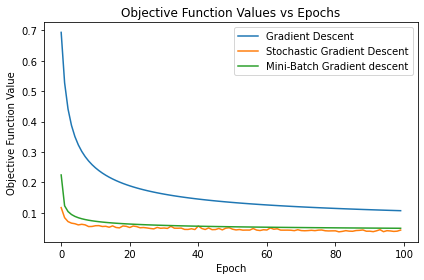

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

epoch_gd=range(len(objvals_gd))
epoch_sgd=range(len(objvals_sgd))
epoch_mbgd=range(len(objvals_mbgd))

plot1,=plt.plot(epoch_gd,objvals_gd)
plot2,=plt.plot(epoch_sgd,objvals_sgd)
plot3,=plt.plot(epoch_mbgd,objvals_mbgd)
plt.title("Objective Function Values vs Epochs")
plt.xlabel('Epoch')
plt.ylabel('Objective Function Value')
plt.legend([plot1,plot2,plot3],['Gradient Descent','Stochastic Gradient Descent','Mini-Batch Gradient descent'])
plt.tight_layout()
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [25]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    f=np.sign(np.dot(X,w))
    return f

In [26]:
# evaluate training error of logistic regression and regularized version
# evaluate training error of logistic regression and regularized version

#Gradient Descent
predict_train=predict(w_gd,x_train)
error_gd=np.mean(np.abs(predict_train-y_train)/2)
# print(predict_train.shape,y_train.shape)
print("Gradient Descent Accuracy: "+str(1-error_gd))

predict_train_reg=predict(w_gd_reg,x_train)
error_gd_reg=np.mean(np.abs(predict_train_reg-y_train)/2)
print("Regularized Gradient Descent Accuracy: "+str(1-error_gd_reg))

#Stochastic Gradient Descent
predict_train=predict(w_sgd,x_train)
error_sgd=np.mean(np.abs(predict_train-y_train)/2)
print(error_sgd)
print("Stochastic Gradient Descent Accuracy: "+str(1-error_sgd))

predict_train_reg=predict(w_sgd_reg,x_train)
error_sgd_reg=np.mean(np.abs(predict_train_reg-y_train)/2)
print("Regularized Stochastic Gradient Descent Accuracy: "+str(1-error_sgd_reg))

#Mini-Batch Gradient Descent
predict_train=predict(w_mbgd,x_train)
error_mbgd=np.mean(np.abs(predict_train-y_train)/2)
print("Mini-Batch Gradient Descent Accuracy: "+str(1-error_mbgd))

predict_train_reg=predict(w_gd_reg,x_train)
error_mbgd_reg=np.mean(np.abs(predict_train_reg-y_train)/2)
print("Regularized Mini-Batch Gradient Descent Accuracy: "+str(1-error_mbgd_reg))

Gradient Descent Accuracy: 0.9824175824175824
Regularized Gradient Descent Accuracy: 0.9582417582417583
0.01098901098901099
Stochastic Gradient Descent Accuracy: 0.989010989010989
Regularized Stochastic Gradient Descent Accuracy: 0.9472527472527472
Mini-Batch Gradient Descent Accuracy: 0.9868131868131869
Regularized Mini-Batch Gradient Descent Accuracy: 0.9582417582417583


In [27]:
# evaluate testing error of logistic regression and regularized version
# evaluate testing error of logistic regression and regularized version
y_test=np.array(y_test).reshape((y_test.shape[0],1))
#Gradient Descent
predict_test=predict(w_gd,x_test)
# print(predict_test.shape,y_test.shape)
error_gd=np.mean(np.abs(predict_test-y_test)/2)
print("Gradient Descent Accuracy: "+str(1-error_gd))

predict_test_reg=predict(w_gd_reg,x_test)
error_gd_reg=np.mean(np.abs(predict_test_reg-y_test)/2)
print("Regularized Gradient Descent Accuracy: "+str(1-error_gd_reg))

#Stochastic Gradient Descent
predict_test=predict(w_sgd,x_test)
error_sgd=np.mean(np.abs(predict_test-y_test)/2)
print("Stochastic Gradient Descent Accuracy: "+str(1-error_sgd))

predict_test_reg=predict(w_sgd_reg,x_test)
error_sgd_reg=np.mean(np.abs(predict_test_reg-y_test)/2)
print("Regularized Stochastic Gradient Descent Accuracy: "+str(1-error_sgd_reg))

#Mini-Batch Gradient Descent
predict_test=predict(w_mbgd,x_test)
error_mbgd=np.mean(np.abs(predict_test-y_test)/2)
print("Mini-Batch Gradient Descent Accuracy: "+str(1-error_mbgd))

predict_test_reg=predict(w_gd_reg,x_test)
error_mbgd_reg=np.mean(np.abs(predict_test_reg-y_test)/2)
print("Regularized Mini-Batch Gradient Descent Accuracy: "+str(1-error_mbgd_reg))

Gradient Descent Accuracy: 0.9824561403508771
Regularized Gradient Descent Accuracy: 0.9736842105263158
Stochastic Gradient Descent Accuracy: 0.9649122807017544
Regularized Stochastic Gradient Descent Accuracy: 0.9736842105263158
Mini-Batch Gradient Descent Accuracy: 0.9824561403508771
Regularized Mini-Batch Gradient Descent Accuracy: 0.9736842105263158


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [38]:
print(gradient_descent(x_train, y_train, 0, 0.1, 1000))

(array([[ 993.72230403],
       [ 996.24968617],
       [ 993.51479117],
       [ 993.8722344 ],
       [ 995.79787622],
       [ 993.42137195],
       [ 992.88775773],
       [ 992.4294363 ],
       [ 995.98610273],
       [ 998.5465032 ],
       [ 994.85698527],
       [ 999.43137329],
       [ 994.85304084],
       [ 995.21286225],
       [ 999.51911137],
       [ 995.9673959 ],
       [ 996.50341364],
       [ 995.17724866],
       [ 999.22394625],
       [ 997.74738815],
       [ 993.26091717],
       [ 995.86006138],
       [ 993.08443064],
       [ 993.58913718],
       [ 995.56340549],
       [ 993.76618551],
       [ 993.25975211],
       [ 992.36544739],
       [ 995.83802037],
       [ 995.879253  ],
       [1002.02989011]]), array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, 

C:\Users\mhans\AppData\Local\Temp\ipykernel_8280\3922307177.py:11: RuntimeWarning: overflow encountered in exp
  mean=np.mean(np.log(1+np.exp(-yxTw)))
C:\Users\mhans\AppData\Local\Temp\ipykernel_8280\4092425742.py:13: RuntimeWarning: overflow encountered in exp
  mean=-np.mean(np.divide(yx,1+np.exp(yxTw)),axis=0).reshape(x.shape[1],1)


In [39]:
print(gradient_descent(x_train, y_train, 2, 0.1, 1000))

(array([[-0.08086646],
       [-0.05340548],
       [-0.08159021],
       [-0.07713448],
       [-0.03781971],
       [-0.05511567],
       [-0.0691749 ],
       [-0.08477704],
       [-0.03328449],
       [ 0.01324279],
       [-0.0572008 ],
       [ 0.00230959],
       [-0.0538072 ],
       [-0.05339496],
       [ 0.0086749 ],
       [-0.01175999],
       [-0.00771201],
       [-0.03064288],
       [ 0.00484111],
       [ 0.01142997],
       [-0.0878646 ],
       [-0.06185244],
       [-0.08738752],
       [-0.08109968],
       [-0.05142394],
       [-0.0608145 ],
       [-0.06821042],
       [-0.08746514],
       [-0.05395631],
       [-0.02991435],
       [ 0.05206703]]), array([           inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,         

C:\Users\mhans\AppData\Local\Temp\ipykernel_8280\3922307177.py:11: RuntimeWarning: overflow encountered in exp
  mean=np.mean(np.log(1+np.exp(-yxTw)))
C:\Users\mhans\AppData\Local\Temp\ipykernel_8280\4092425742.py:13: RuntimeWarning: overflow encountered in exp
  mean=-np.mean(np.divide(yx,1+np.exp(yxTw)),axis=0).reshape(x.shape[1],1)


In [42]:
print(mbgd(x_train, y_train, 0, 0.1, 1000))

C:\Users\mhans\AppData\Local\Temp\ipykernel_8280\3946927642.py:14: RuntimeWarning: overflow encountered in exp
  obj=np.mean(np.log(1+np.exp(-yxTw)))+((lam/2)*np.sum(w*w))
C:\Users\mhans\AppData\Local\Temp\ipykernel_8280\3946927642.py:15: RuntimeWarning: overflow encountered in exp
  g=np.mean(np.divide(-yixi,1+np.exp(yxTw)),axis=0).reshape(xi.shape[1],1)+(lam*w)


(array([[ 718.57978314],
       [ 829.42632752],
       [ 708.84192436],
       [ 725.06370895],
       [ 806.65146029],
       [ 700.0510865 ],
       [ 676.65629041],
       [ 656.13895847],
       [ 812.55683326],
       [ 930.48032811],
       [ 767.20815937],
       [ 966.82694109],
       [ 766.60564054],
       [ 784.10955287],
       [ 971.68987363],
       [ 815.61938006],
       [ 841.44728786],
       [ 779.79954374],
       [ 954.75718837],
       [ 895.79249601],
       [ 696.99049923],
       [ 809.20548853],
       [ 688.64541551],
       [ 711.69286961],
       [ 795.36058792],
       [ 715.74452355],
       [ 694.05208843],
       [ 652.58711129],
       [ 804.46965964],
       [ 810.14228021],
       [1090.95266003]]), array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, 

In [43]:
print(mbgd(x_train, y_train, 2, 0.1, 1000))

(array([[-0.07501062],
       [-0.07602998],
       [-0.07698624],
       [-0.07271033],
       [-0.0213771 ],
       [-0.06049255],
       [-0.07711342],
       [-0.08357994],
       [ 0.0062552 ],
       [ 0.00060297],
       [-0.04745587],
       [-0.00366111],
       [-0.05068998],
       [-0.04988788],
       [-0.00204516],
       [-0.02769433],
       [-0.01666866],
       [-0.02778045],
       [ 0.02015244],
       [ 0.00318385],
       [-0.08565064],
       [-0.08783097],
       [-0.08879176],
       [-0.08015267],
       [-0.05296954],
       [-0.07896522],
       [-0.08990927],
       [-0.08800279],
       [-0.04837104],
       [-0.05466161],
       [ 0.06673533]]), array([       inf, 0.5020084 , 0.50188223, 0.50188223, 0.50188223,
       0.50188223, 0.50188223, 0.50188223, 0.50188223, 0.50188223,
       0.50188223, 0.50188223, 0.50188223, 0.50188223, 0.50188223,
       0.50188223, 0.50188223, 0.50188223, 0.50188223, 0.50188223,
       0.50188223, 0.50188223, 0.50188223, 0.50

C:\Users\mhans\AppData\Local\Temp\ipykernel_8280\3946927642.py:14: RuntimeWarning: overflow encountered in exp
  obj=np.mean(np.log(1+np.exp(-yxTw)))+((lam/2)*np.sum(w*w))
C:\Users\mhans\AppData\Local\Temp\ipykernel_8280\3946927642.py:15: RuntimeWarning: overflow encountered in exp
  g=np.mean(np.divide(-yixi,1+np.exp(yxTw)),axis=0).reshape(xi.shape[1],1)+(lam*w)
